In [1]:
import keras
import numpy as np
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Visualizing training samples

In [4]:
word_index = imdb.get_word_index()

index_word = {y:x for x,y in tqdm_notebook(word_index.items())}

' '.join([index_word.get(x-3,'?') for x in train_data[0]])

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

### Vectorizing training samples to same lenght

In [5]:
def vectorize_sequences(sequences, dimensions):
    results = np.zeros((len(sequences), dimensions))
    for i, seq in enumerate(tqdm_notebook(sequences)):
        results[i, seq] = 1
    return results

In [6]:
x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)

In [9]:
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(test_labels).astype('float32')

y_train = vectorize_sequences(train_labels, 2)
y_test = vectorize_sequences(test_labels, 2)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### Model definition

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

### Compiling Model

In [16]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#### OR

In [15]:
#If we want to use custom functions for each of the compiling parameters
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.binary_accuracy])

### Creating Validation set

In [20]:
x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:]

### Training

In [21]:
history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.5136 - acc: 0.7812 - val_loss: 0.3790 - val_acc: 0.8759
Epoch 2/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.3023 - acc: 0.9003 - val_loss: 0.2978 - val_acc: 0.8915
Epoch 3/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.2141 - acc: 0.9303 - val_loss: 0.3020 - val_acc: 0.8748
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1690 - acc: 0.9447 - val_loss: 0.2826 - val_acc: 0.8875
Epoch 5/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1364 - acc: 0.9565 - val_loss: 0.2869 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1062 - acc: 0.9677 - val_loss: 0.3032 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0875 - acc: 0.9735 - val_loss: 0.3231 - 

In [22]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

### Plotting the training and validation loss

In [23]:
import matplotlib.pyplot as plt

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

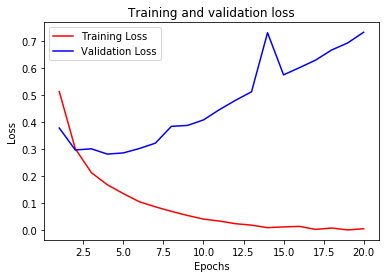

In [25]:
plt.plot(epochs, loss_values, 'r', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

In [23]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(acc_values)+1)

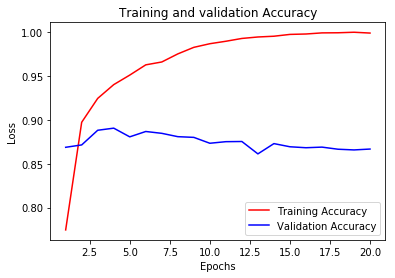

In [24]:
plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Prediction

In [25]:
model.predict(x_test)

array([[0.00833665],
       [1.        ],
       [0.91118455],
       ...,
       [0.00500611],
       [0.01985313],
       [0.866945  ]], dtype=float32)

In [4]:
from postal.parser import parse_address

In [11]:
parse_address('1902, 19th Floor, Tower B, Peninsula Business Park, Ganpatrao Kadam Marg, Lower Parel, Mumbai, Maharashtra 400013')

[(u'1902', u'house_number'),
 (u'19th floor tower b peninsula business park ganpatrao kadam marg', u'road'),
 (u'lower parel', u'suburb'),
 (u'mumbai', u'city'),
 (u'maharashtra', u'state'),
 (u'400013', u'postcode')]